# Mathematical definition of derivatives

![Derivative](figure_04_derivatives.png)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}\\)

All three definitions are equivalent in case of a continuous function.

# Numerical implementation of first-order derivatives

Forward differences
\\( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}\\)

Backward differences
\\( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}\\)

Central differences
\\( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}\\)

## Example function: \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
def f(x):
    return np.sin(x) * x - 1/100 * x**3

In [3]:
x_list = np.linspace(-10,10,201)
y_list = f(x_list)

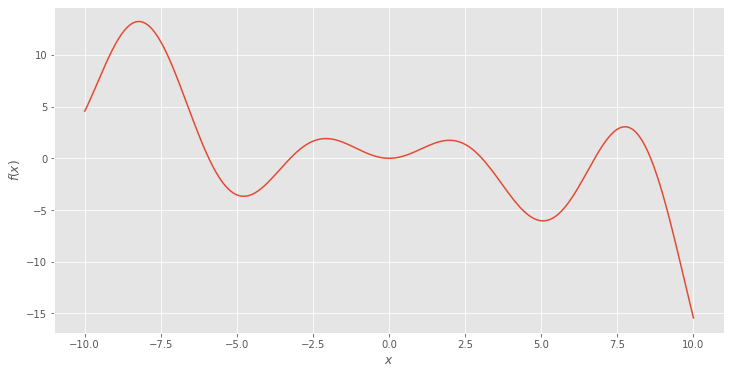

In [4]:
plt.figure(figsize=(12, 6));

plt.plot(x_list, y_list);

plt.xlabel('$x$');
plt.ylabel('$f(x)$');

In [5]:
x_list = np.linspace(-10,10,201)
analytical_d_list = np.cos(x_list) * x_list + np.sin(x_list) - 3/100 * x_list**2

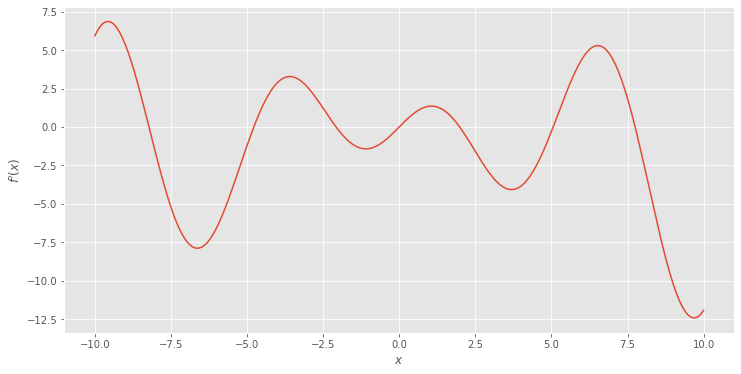

In [6]:
plt.figure(figsize=(12, 6));

plt.plot(x_list, analytical_d_list);

plt.xlabel('$x$');
plt.ylabel("$f'(x)$");

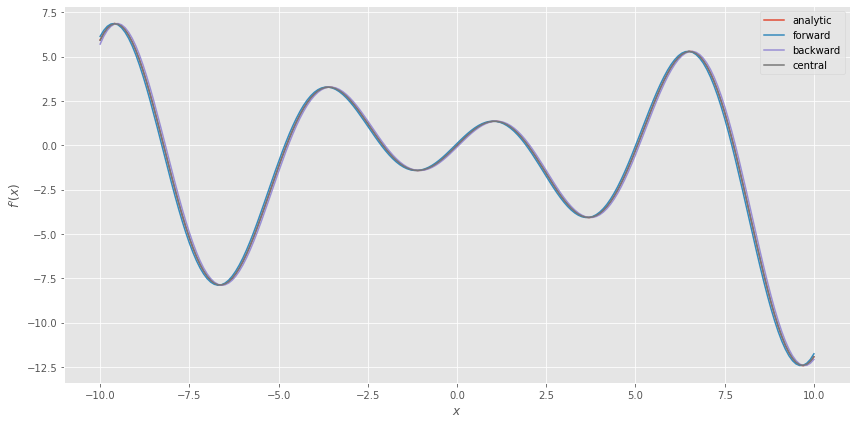

In [7]:
x_list = np.linspace(-10,10,201)
h = 0.1

forward_d_list = (f(x_list+h) - f(x_list)) / h
backward_d_list = (f(x_list) - f(x_list - h)) / h
central_d_list = (f(x_list+h) - f(x_list-h)) / (2*h)

plt.figure(figsize=(12,6));
plt.plot(x_list, analytical_d_list, label='analytic');
plt.plot(x_list, forward_d_list, label='forward');
plt.plot(x_list, backward_d_list, label='backward');
plt.plot(x_list, central_d_list, label='central');

plt.xlabel('$x$');
plt.ylabel("$f'(x)$");
plt.legend();
plt.tight_layout();

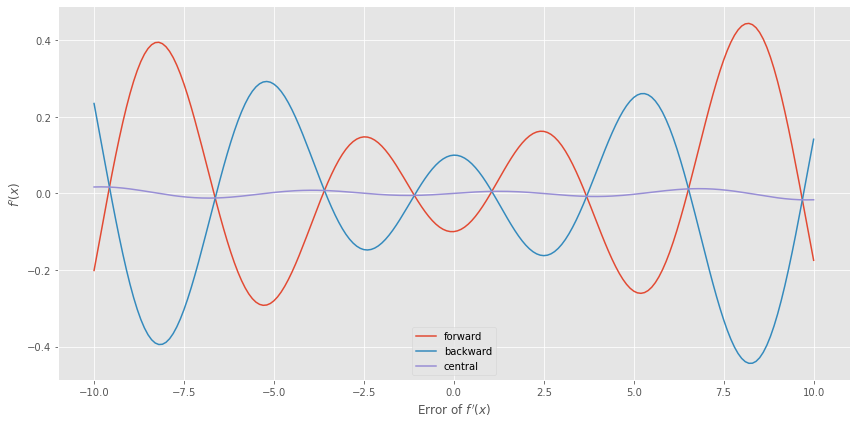

In [8]:
plt.figure(figsize=(12,6));

plt.plot(x_list, analytical_d_list - forward_d_list, label='forward');
plt.plot(x_list, analytical_d_list - backward_d_list, label='backward');
plt.plot(x_list, analytical_d_list - central_d_list, label='central');


plt.xlabel("Error of $f'(x)$");
plt.ylabel("$f'(x)$");
plt.legend();
plt.tight_layout();

## Why is central differences (typically) better than forward and backward differences?

Forward differences
\\( f'(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h)\\)

Backward differences
\\( f'(x)=\frac{f(x)-f(x-h)}{h}+\mathcal{O}(h)\\)

Central differences
\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

- \\(\mathcal{O}(h^n)\\) means that the error is proportional to h^n.
- Since \\(h\\) is small, the central differences method is more accurate. Why?

Taylor expansion: 

\\(f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\frac{1}{6}f'''(x)h^3+\dots\\)

\\(f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\\)

- From the first and second line we can imediately see the  \\(\mathcal{O}(h)\\) dependence of the forward and backward differences methods

\\(f'(x)=\frac{1}{h}\left[f(x+h)-f(x)-\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3+\dots\right]=\frac{f(x+h)-f(x)}{h}-\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2+\dots\\)

\\(f'(x)=\frac{1}{h}\left[f(x)-f(x-h)+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\right]=\frac{f(x)-f(x-h)}{h}+\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2\pm\dots\\)


- To find the \\(\mathcal{O}(h^2)\\) dependence of the central differences method, we have to subtract the two terms

\\(f(x+h)-f(x-h)=2f'(x)h+\frac{1}{3}f'''(x)h^3+\dots\\)

\\(\frac{1}{2h}\left[f(x+h)-f(x-h)\right]=f'(x)+\frac{1}{6}f'''(x)h^2+\dots\\)

\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

## Higher accuracy:

Richardson: \\(f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

In [9]:
def D1Richardson(f, x, h):
    """
    f: function
    x: argument of f
    h: stepsize
    """
    return 1/(12*h) * (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))

In [11]:
richardson_d_list = D1Richardson(f, x_list, h)

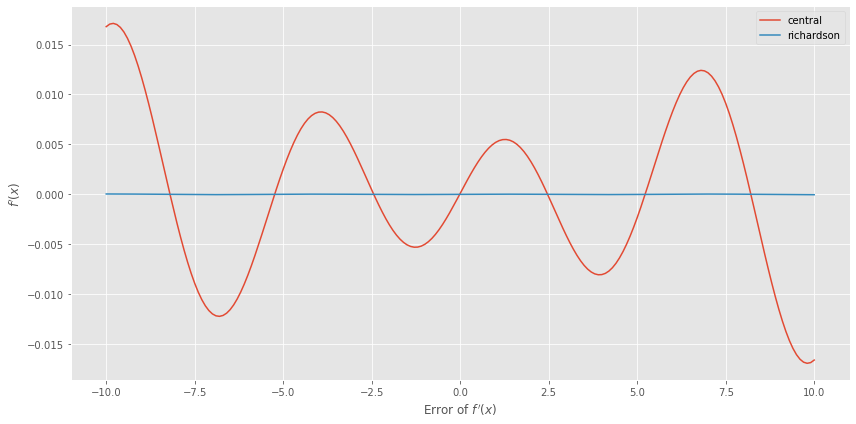

In [14]:
plt.figure(figsize=(12,6));

#plt.plot(x_list, analytical_d_list - forward_d_list, label='forward');
#plt.plot(x_list, analytical_d_list - backward_d_list, label='backward');
plt.plot(x_list, analytical_d_list - central_d_list, label='central');
plt.plot(x_list, analytical_d_list - richardson_d_list, label='richardson');



plt.xlabel("Error of $f'(x)$");
plt.ylabel("$f'(x)$");
plt.legend();
plt.tight_layout();

## Even higher accuracy

Iteration formula:

\\(D_{n+1}=\frac{2^{2n}D_n(h)-D_n(2h)}{2^{2n}-1}\\)

In [20]:
def D1nRichardson(nmax, f, x, h):
    """
    nmax: order of iteration for 1st derivative
    f: function
    x: argument of f
    h: stepsize
    """
    #d0 = np.array([ D1Richardson(f, x, h*2**j) for j in range(0,n)])
    d0 = np.array([ 1/(12*h*2**j) * ( f(x-2*h*2**j) - 8*f(x-h*2**j) + 8*f(x+h*2**j) - f(x+2*h*2**j) ) for j in range(0,nmax)])
    for n in range(1,nmax):
        print(d0)
        d = np.array([(2**(2*n)*d0[j] - d0[j+1]) / (2**(2*n)-1) for j in range(0,len(d0)-1)])
        d0 = d
    return d

Calculate f'(x) for \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\) at \\(x = 3\\)

In [21]:
D1nRichardson(5, f, 3, h)

[-3.09884994 -3.09873722 -3.09695717 -3.06993837 -2.72051967]
[-3.09888752 -3.09933057 -3.10596344 -3.18641127]
[-3.09885798 -3.09888837 -3.10060025]
[-3.0988575 -3.0988612]


array([-3.09885748])